In [1]:
import xsimlab as xs
import sparse
import numpy as np

In [2]:
@xs.process
class A:
    index = xs.index(dims=('i'))
    sparse = xs.variable(
        dims=('i', 'i'),
        intent='out'
    )
    
    def initialize(self):
        self.index = np.arange(10)
        self.sparse = sparse.COO([
            np.arange(10),
            np.arange(10)
        ], 1)
    
    @xs.runtime(args='step')
    def run_step(self, step):
        pass
        
@xs.process
class B:
    sparse = xs.foreign(A, 'sparse')
    out_sparse = xs.variable(
        dims=('i', 'i'),
        intent='out'
    )
    
    @xs.runtime(args='step')
    def run_step(self, step):
        self.out_sparse = self.sparse * step

In [3]:
model = xs.Model({
    'a': A,
    'b': B
})

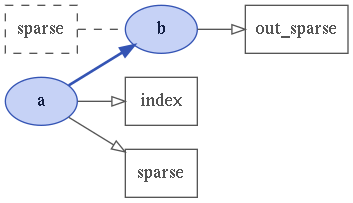

In [4]:
model.visualize(show_variables=True)

In [5]:
ds = xs.create_setup(
    model,
    clocks={'t': np.arange(10)},
    output_vars={
        'b__out_sparse':'t'
    }
)

In [6]:
ds.xsimlab.run(model)

<xarray.Dataset>
Dimensions:        (i: 10, t: 10)
Coordinates:
  * t              (t) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: i
Data variables:
    b__out_sparse  (t, i, i) float64 nan nan nan nan nan ... nan nan nan nan 8.0
    index          (i) float64 nan 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0